In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import random

# Load the dataset
data_path = 'GlobalWeatherRepository.csv'
data = pd.read_csv(data_path)

In [63]:
# Drop nilai null pada kolom temperature_celsius
data = data[['temperature_celsius']].dropna()

# Menyiapkan input size
input_sizes = [500, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]

# Skenario terbaik: data sudah terurut (median pivot)
def generate_best_case(size):
    return list(range(size))  # Best case where median pivot will split equally

# Skenario terburuk: pivot selalu elemen pertama atau terakhir
def generate_worst_case(size):
    return list(range(size, 0, -1))  # Reverse sorted data simulates worst-case pivot

# Skenario rata-rata: pivot dipilih secara acak
def generate_average_case(size):
    data = list(range(size))
    random.shuffle(data)  # Shuffle data to simulate average case
    return data

# Generate datasets for all cases
data_best_case = [generate_best_case(size) for size in input_sizes]
data_worst_case = [generate_worst_case(size) for size in input_sizes]
data_average_case = [generate_average_case(size) for size in input_sizes]


In [64]:
# Implementasi algoritma Quicksort (Rekursif)
def quicksort_rekursif(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort_rekursif(left) + middle + quicksort_rekursif(right)

In [65]:
# Implementasi algoritma Quicksort (Iteratif)
def quicksort_iteratif(arr):
    stack = [(0, len(arr) - 1)]
    while stack:
        start, end = stack.pop()
        if start >= end:
            continue
        pivot_index = partition(arr, start, end)
        stack.append((start, pivot_index - 1))
        stack.append((pivot_index + 1, end))
    return arr

In [66]:
def partition(arr, start, end):
    pivot = arr[start]  # Pivot chosen as first element
    i = start + 1
    for j in range(start + 1, end + 1):
        if arr[j] < pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[start], arr[i - 1] = arr[i - 1], arr[start]
    return i - 1

In [75]:
# Measure performance
def measure_performance(func, arr):
    start_time = time.time()
    func(arr.copy())
    return time.time() - start_time

# Run tests for best and worst cases
best_case_rekursif = []
worst_case_rekursif = []
average_case_rekursif = []
best_case_iteratif = []
worst_case_iteratif = []
average_case_iteratif = []

for best, worst, avg, size in zip(data_best_case, data_worst_case, data_average_case, input_sizes):
    # Recursive Quicksort
    rec_best_time = measure_performance(quicksort_rekursif, best)
    rec_worst_time = measure_performance(quicksort_rekursif, worst)
    rec_avg_time = measure_performance(quicksort_rekursif, avg)
    best_case_rekursif.append(rec_best_time)
    worst_case_rekursif.append(rec_worst_time)
    average_case_rekursif.append(rec_avg_time)

    # Iterative Quicksort
    itr_best_time = measure_performance(quicksort_iteratif, best)
    itr_worst_time = measure_performance(quicksort_iteratif, worst)
    itr_avg_time = measure_performance(quicksort_iteratif, avg)
    best_case_iteratif.append(itr_best_time)
    worst_case_iteratif.append(itr_worst_time)
    average_case_iteratif.append(itr_avg_time)

    print(f"Input Size: {size}\nRekursif Best Case: {rec_best_time:.6f} seconds | Iteratif Best Case: {itr_best_time:.6f} seconds\nRekursif Worst Case: {rec_worst_time:.6f} seconds | Iteratif Worst Case: {itr_worst_time:.6f} seconds\nRekursif Average Case: {rec_avg_time:.6f} seconds | Iteratif Average Case: {itr_avg_time:.6f} seconds\n")


Input Size: 500
Rekursif Best Case: 0.000934 seconds | Iteratif Best Case: 0.011345 seconds
Rekursif Worst Case: 0.001201 seconds | Iteratif Worst Case: 0.015764 seconds
Rekursif Average Case: 0.001257 seconds | Iteratif Average Case: 0.000848 seconds

Input Size: 1000
Rekursif Best Case: 0.001836 seconds | Iteratif Best Case: 0.034014 seconds
Rekursif Worst Case: 0.001748 seconds | Iteratif Worst Case: 0.062625 seconds
Rekursif Average Case: 0.003411 seconds | Iteratif Average Case: 0.002055 seconds

Input Size: 5000
Rekursif Best Case: 0.011416 seconds | Iteratif Best Case: 1.627483 seconds
Rekursif Worst Case: 0.010665 seconds | Iteratif Worst Case: 2.271365 seconds
Rekursif Average Case: 0.014720 seconds | Iteratif Average Case: 0.021088 seconds

Input Size: 10000
Rekursif Best Case: 0.023849 seconds | Iteratif Best Case: 3.355332 seconds
Rekursif Worst Case: 0.022910 seconds | Iteratif Worst Case: 7.207572 seconds
Rekursif Average Case: 0.032483 seconds | Iteratif Average Case: 0.

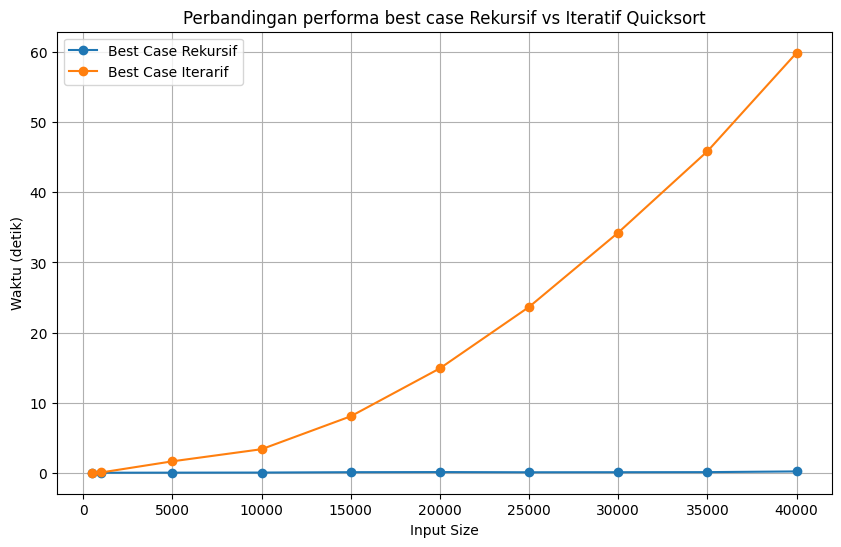

In [76]:
# Visualisasi perbandingan performa best case Rekursif vs Iteratif Quicksort
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, best_case_rekursif, label='Best Case Rekursif', marker='o')
plt.plot(input_sizes, best_case_iteratif, label='Best Case Iterarif', marker='o')
plt.title('Perbandingan performa best case Rekursif vs Iteratif Quicksort')
plt.xlabel('Input Size')
plt.ylabel('Waktu (detik)')
plt.legend()
plt.grid(True)
plt.show()

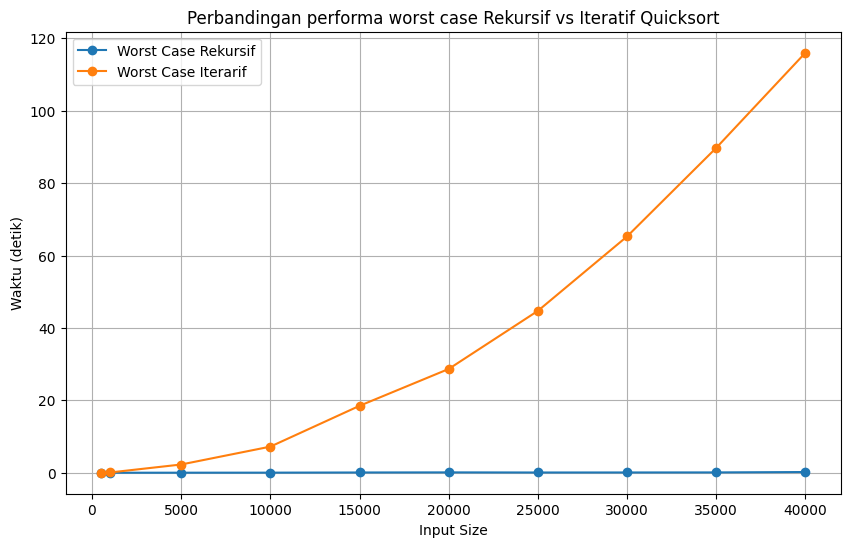

In [77]:
# Visualisasi perbandingan performa worst case Rekursif vs Iteratif Quicksort
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, worst_case_rekursif, label='Worst Case Rekursif', marker='o')
plt.plot(input_sizes, worst_case_iteratif, label='Worst Case Iterarif', marker='o')
plt.title('Perbandingan performa worst case Rekursif vs Iteratif Quicksort')
plt.xlabel('Input Size')
plt.ylabel('Waktu (detik)')
plt.legend()
plt.grid(True)
plt.show()

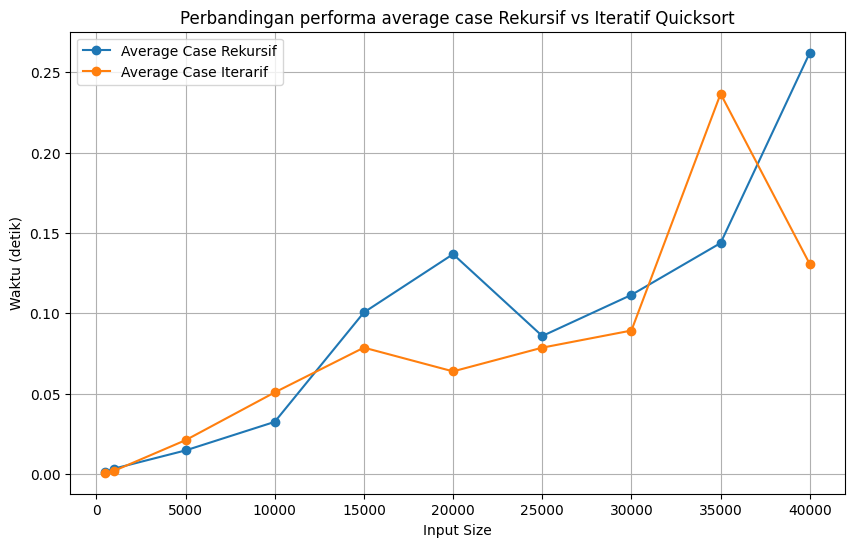

In [78]:
# Visualisasi perbandingan performa average case Rekursif vs Iteratif Quicksort
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, average_case_rekursif, label='Average Case Rekursif', marker='o')
plt.plot(input_sizes, average_case_iteratif, label='Average Case Iterarif', marker='o')
plt.title('Perbandingan performa average case Rekursif vs Iteratif Quicksort')
plt.xlabel('Input Size')
plt.ylabel('Waktu (detik)')
plt.legend()
plt.grid(True)
plt.show()

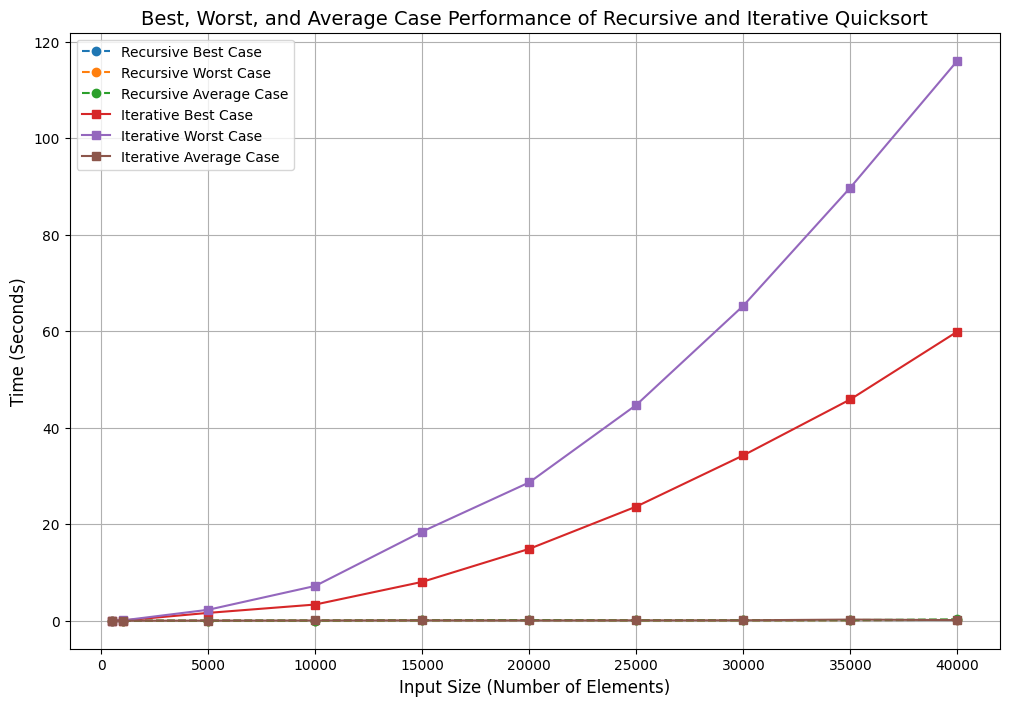

In [80]:
# Visualization
plt.figure(figsize=(12, 8))

# Plot recursive case data
plt.plot(input_sizes, best_case_rekursif, label='Recursive Best Case', marker='o', linestyle='--')
plt.plot(input_sizes, worst_case_rekursif, label='Recursive Worst Case', marker='o', linestyle='--')
plt.plot(input_sizes, average_case_rekursif, label='Recursive Average Case', marker='o', linestyle='--')

# Plot iterative case data
plt.plot(input_sizes, best_case_iteratif, label='Iterative Best Case', marker='s', linestyle='-')
plt.plot(input_sizes, worst_case_iteratif, label='Iterative Worst Case', marker='s', linestyle='-')
plt.plot(input_sizes, average_case_iteratif, label='Iterative Average Case', marker='s', linestyle='-')

# Add labels, title, legend, and grid
plt.xlabel('Input Size (Number of Elements)', fontsize=12)
plt.ylabel('Time (Seconds)', fontsize=12)
plt.title('Best, Worst, and Average Case Performance of Recursive and Iterative Quicksort', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

# Show the graph
plt.show()